In [2]:
"""
An investigation into the python environment using julia numerics to test if it is behaving as expected.

Checklist: 
Set environment step to be equal to numeric step (RESOLVED DISCOVERED OVER COUNTING ISSUE WITH ONE TOO MANY BOXES)
    - goal see that double discount works as expected
    - also enables you to check the next point
Only take one environment step which is much larger than a numeric step (TODO)
    - goal check that throughout an environment step the numeric steps discount and aproximate the integral appropriatly

"""

'\nAn investigation into the python environment using julia numerics to test if it is behaving as expected.\n\nChecklist: \nSet environment step to be equal to numeric step (RESOLVED DISCOVERED OVER COUNTING ISSUE WITH ONE TOO MANY BOXES)\n    - goal see that double discount works as expected\n    - also enables you to check the next point\nOnly take one environment step which is much larger than a numeric step (TODO)\n    - goal check that throughout an environment step the numeric steps discount and aproximate the integral appropriatly\n\n'

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from synthetic_env_julia_solver import synthetic_env

In [45]:
kappa = 0.001
BETA = 0.1
D = 0.1
PHI = 2*D+np.sqrt(BETA+4*D**2)#0.7#1.2
NU = 0.99

In [36]:
env = synthetic_env(0.1,BETA, kappa,D,NU)
env.deltaT = 0.05
delta_t = env.deltaT
delta_r = 0.002
env.limit = 2.0

In [37]:
#steps=0
length = int(env.limit/env.deltaT)
penalties = []
while not env.isOver():
    
    """
    Save all penalties
    caclulate the single time resolution returns
    break into larger steps and caclulate the larger step returns
    plot and compare (if it checks out return to other problem to try and resolve mismatch)
    """
    
    penalty = env.step(0.1)
    penalties.append(penalty)
    #steps+=1
#env.reset()

In [46]:
steps = len(penalties)
returns = np.zeros(steps)
discount = np.exp(-NU*env.deltaT)
sub_intervals=10
G_i = 0

for i in reversed(range(steps)):
    G_i = G_i*discount + penalties[i]*env.deltaT
    returns[i] = G_i
    
    
coarse_penalties = np.zeros(sub_intervals)
coarse_returns = np.zeros(sub_intervals)
big_step = steps/sub_intervals * delta_t
for i in range(sub_intervals):
    assert(steps%sub_intervals==0)
    length = int(steps/sub_intervals)
    sub_return = 0
    for pen in penalties[i*length:(i+1)*length]:
        sub_return = sub_return * discount + pen*delta_t
    #print(sub_return)
    coarse_penalties[i] = sub_return

ret=0
for i in reversed(range(sub_intervals)):
    ret = ret * np.exp(-NU*big_step) + coarse_penalties[i]
    coarse_returns[i] = ret

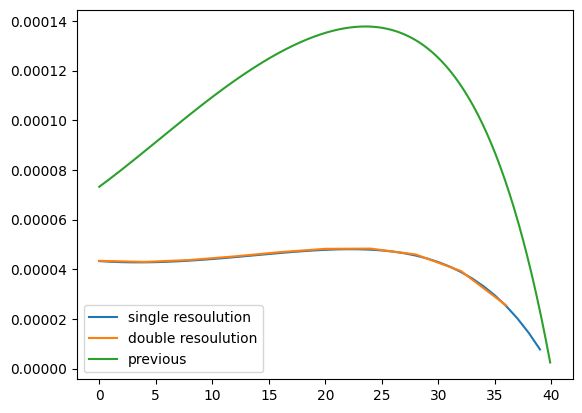

In [47]:
plt.plot(returns)
plt.plot(np.arange(len(coarse_returns))*steps/sub_intervals,coarse_returns)
plt.plot(np.arange(len(prev_returns))/10,prev_returns)
plt.legend(labels=["single resoulution","double resoulution", "previous"])

In [29]:
prev_returns = copy.deepcopy(returns)

In [31]:
prev_steps=steps

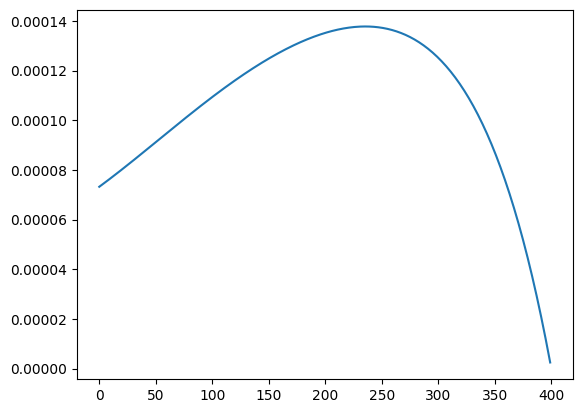

In [30]:
plt.plot(prev_returns)

In [7]:
env.limit%env.deltaT

0.004999999999999979

In [48]:
PHI

0.5741657386773942

In [9]:
env.getTime()

1.0

In [12]:
steps = 1000
penalties = np.random.rand(steps)*0.0005
returns = np.zeros(steps)
discount = np.exp(-NU*delta_t)
S_n=0
sub_intervals=100
#One continous discount
for i in reversed(range(steps)):
    S_n = S_n*discount + penalties[i]*delta_t
    returns[i] = S_n
    
# Compilation of discounts
coarse_penalties = np.zeros(sub_intervals)
coarse_returns = np.zeros(sub_intervals)
env_step = steps/sub_intervals * delta_t
for i in range(sub_intervals):
    assert(steps%sub_intervals==0)
    length = int(steps/sub_intervals)
    sub_return = 0
    for pen in penalties[i*length:(i+1)*length]:
        sub_return = sub_return * discount + pen*delta_t
    #print(sub_return)
    coarse_penalties[i] = sub_return

ret=0
for i in reversed(range(sub_intervals)):
    ret = ret * np.exp(-NU*env_step) + coarse_penalties[i]
    coarse_returns[i] = ret
    

In [74]:
penalties

array([1.00019603, 1.08245887, 1.06575469, 1.07231672, 1.04230194,
       1.03754146, 1.09821421, 1.0982098 , 1.0766724 , 1.06106412,
       1.09694272, 1.09550316, 1.0041274 , 1.03850558, 1.09550717,
       1.0345307 , 1.04642398, 1.05745763, 1.06342837, 1.0398016 ,
       1.04234495, 1.04552663, 1.02840978, 1.04295786, 1.01975546,
       1.06373436, 1.00752937, 1.00379162, 1.06968001, 1.03911101,
       1.01664737, 1.02176014, 1.06772191, 1.0194602 , 1.06243494,
       1.0077794 , 1.01782664, 1.02976551, 1.05626884, 1.02601362,
       1.0881609 , 1.08885106, 1.02672426, 1.06558843, 1.09435409,
       1.08541766, 1.06502212, 1.01557364, 1.0085084 , 1.03971944,
       1.06770358, 1.05288203, 1.02975734, 1.00235899, 1.0578789 ,
       1.02508233, 1.09266359, 1.04100617, 1.08483057, 1.09729929,
       1.01634747, 1.02443489, 1.09219062, 1.07741623, 1.03402604,
       1.07960317, 1.02257887, 1.08362411, 1.08515821, 1.09675634,
       1.03598717, 1.00920068, 1.01859006, 1.02559041, 1.00818

In [39]:
np.arange(len(coarse_returns))*10

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])